# Analysis

For each query specified in the assignment, compute the answers. Include a plot of
these results in this notebook. Briefly discuss what you can observe from these results. Beware that for some queries, not all of the sub-dataset types have the information required to answer the query. In that case, please ignore those sub-datasets

### Monthly Total Number of trips

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

df_yellow = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_yellow.csv")
df_yellow['tot_amount'] = df_yellow['total_amount'] - df_yellow['tip_amount']
df_green = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_green.csv")
df_green['tot_amount'] = df_green['total_amount'] - df_green['tip_amount']
df_fhv = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_fhv.csv")
df_fhvhv = pd.read_csv("C:\\Users\\ivomb\\OneDrive\\Msc Data Science\\INFOH600-Computing Foundations\\Project\\df_fhvhv.csv")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [4]:
df_y = pd.DataFrame(df_yellow.groupby('trip_month').size(),columns=['Number_of_Records'])
df_y['Trip_Month']= df_y.index

In [5]:
df_g = pd.DataFrame(df_green.groupby('trip_month').size(),columns=['Number_of_Records'])
df_g['Trip_Month']= df_g.index

In [6]:
df_f = pd.DataFrame(df_fhv.groupby('trip_month').size(),columns=['Number_of_Records'])
df_f['Trip_Month']= df_f.index

In [7]:
df_fv = pd.DataFrame(df_fhvhv.groupby('trip_month').size(),columns=['Number_of_Records'])
df_fv['Trip_Month']= df_fv.index

In [8]:
df_concat = pd.concat([df_y['Number_of_Records'], df_g['Number_of_Records'], df_f['Number_of_Records'], df_fv['Number_of_Records']], axis=1)
df_concat.set_axis(["yellow", "green","fhv","fhvhv"], axis=1, inplace=True)
df_concat

,yellow,green,fhv,fhvhv
trip_month,,,,
1,278903,13273,78806,41138.0
2,265776,13572,35221,40290.0
3,281493,14230,41844,74488.0
4,276731,13742,40337,52045.0
5,280122,14183,40763,56792.0
6,267732,13123,64023,57066.0
7,240028,11390,66372,NaN
8,228143,11225,67260,NaN
9,243834,11131,67033,NaN


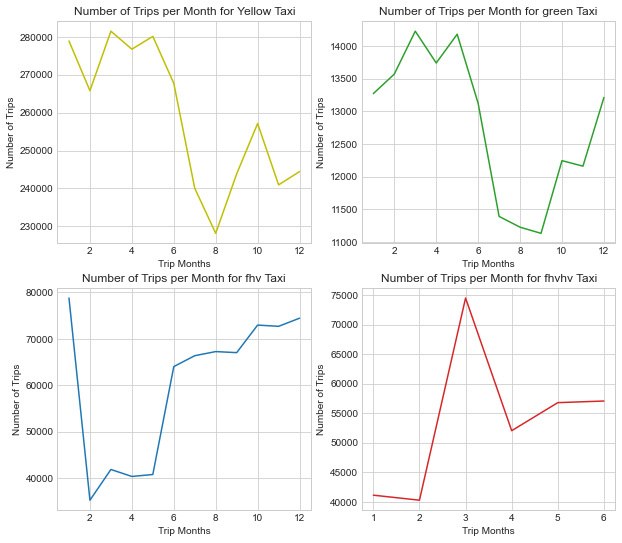

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))
axs[0, 0].plot(df_y['Trip_Month'],df_y['Number_of_Records'],'y')
axs[0, 0].set_title("Number of Trips per Month for Yellow Taxi")
axs[0, 1].plot(df_g['Trip_Month'],df_g['Number_of_Records'], 'tab:green')
axs[0, 1].set_title("Number of Trips per Month for green Taxi")
axs[1, 0].plot(df_f['Trip_Month'],df_f['Number_of_Records'], 'tab:blue')
axs[1, 0].set_title("Number of Trips per Month for fhv Taxi")
axs[1, 1].plot(df_fv['Trip_Month'],df_fv['Number_of_Records'], 'tab:red')
axs[1, 1].set_title("Number of Trips per Month for fhvhv Taxi")

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Number of Trips')


#### Monthly total number of trips in Manhattan and Brooklyn

In [10]:
df_value = pd.read_csv("C:\\Users\\ivomb\\Downloads\\taxi+_zone_lookup.csv")
df_value = df_value[df_value['Borough'].isin(['Manhattan', 'Brooklyn'])]
df_value.head()

,LocationID,Borough,Zone,service_zone
3,4,Manhattan,Alphabet City,Yellow Zone
10,11,Brooklyn,Bath Beach,Boro Zone
11,12,Manhattan,Battery Park,Yellow Zone
12,13,Manhattan,Battery Park City,Yellow Zone
13,14,Brooklyn,Bay Ridge,Boro Zone


In [11]:
df_y = df_yellow[df_yellow['pulocationid'].isin(df_value['LocationID'])]
df_y = pd.DataFrame(df_y.groupby('trip_month').size(),columns=['Number_of_Records'])
df_y['Trip_Month']= df_y.index

In [12]:
df_g = df_green[df_yellow['pulocationid'].isin(df_value['LocationID'])]
df_g = pd.DataFrame(df_g.groupby('trip_month').size(),columns=['Number_of_Records'])
df_g['Trip_Month']= df_g.index

In [13]:
df_f = df_fhv[df_yellow['pulocationid'].isin(df_value['LocationID'])]
df_f = pd.DataFrame(df_f.groupby('trip_month').size(),columns=['Number_of_Records'])
df_f['Trip_Month']= df_f.index


In [14]:
df_fv = df_fhvhv[df_yellow['pulocationid'].isin(df_value['LocationID'])]
df_fv = pd.DataFrame(df_fv.groupby('trip_month').size(),columns=['Number_of_Records'])
df_fv['Trip_Month']= df_fv.index


In [15]:
df_concat = pd.concat([df_y['Number_of_Records'], df_g['Number_of_Records'], df_f['Number_of_Records'], df_fv['Number_of_Records']], axis=1)
df_concat.set_axis(["yellow", "green","fhv","fhvhv"], axis=1, inplace=True)
df_concat

,yellow,green,fhv,fhvhv
trip_month,,,,
1,263737,12659,74952,38970.0
2,252229,12997,33401,38604.0
3,266206,13581,39817,71147.0
4,261441,13133,38333,49635.0
5,263728,13564,38950,54040.0
6,251904,12527,61290,54052.0
7,225738,10907,63427,NaN
8,213907,10747,64145,NaN
9,229248,10626,63723,NaN


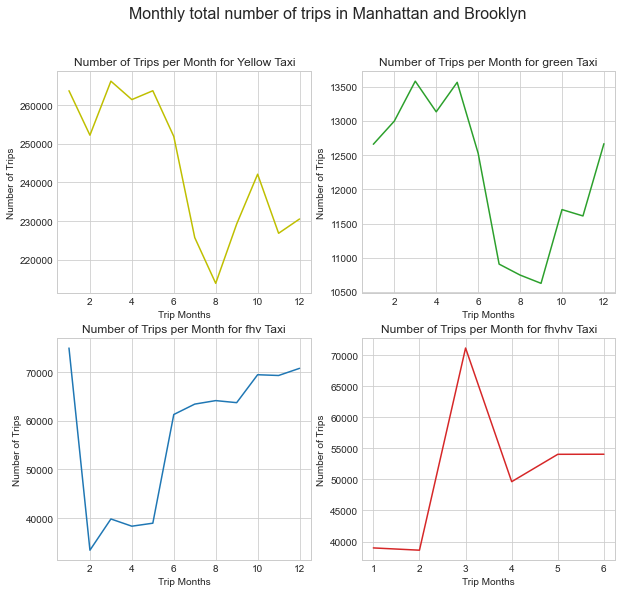

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,9))
axs[0, 0].plot(df_y['Trip_Month'],df_y['Number_of_Records'],'y')
axs[0, 0].set_title("Number of Trips per Month for Yellow Taxi")
axs[0, 1].plot(df_g['Trip_Month'],df_g['Number_of_Records'], 'tab:green')
axs[0, 1].set_title("Number of Trips per Month for green Taxi")
axs[1, 0].plot(df_f['Trip_Month'],df_f['Number_of_Records'], 'tab:blue')
axs[1, 0].set_title("Number of Trips per Month for fhv Taxi")
axs[1, 1].plot(df_fv['Trip_Month'],df_fv['Number_of_Records'], 'tab:red')
axs[1, 1].set_title("Number of Trips per Month for fhvhv Taxi")
fig.suptitle('Monthly total number of trips in Manhattan and Brooklyn', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Number of Trips')

In [17]:
sum(df_yellow['tot_amount'])

39926311.85933036

### Monthly total receipts, grouped per dataset type

In [230]:
df_y = df_yellow.groupby(['trip_month']).agg({'tot_amount' :'sum'})
df_y['Trip_Month']= df_y.index

In [231]:
df_g = df_green.groupby(['trip_month']).agg({'tot_amount':'sum'})
df_g['Trip_Month']= df_g.index


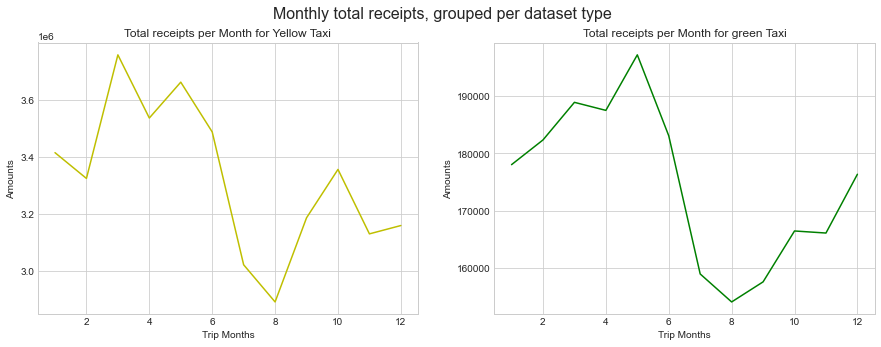

In [232]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df_y['Trip_Month'],df_y['tot_amount'],'y')
axs[0].set_title("Total receipts per Month for Yellow Taxi")
axs[1].plot(df_g['Trip_Month'],df_g['tot_amount'],'g')
axs[1].set_title("Total receipts per Month for green Taxi")


fig.suptitle('Monthly total receipts, grouped per dataset type', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Amounts')

In [233]:
df_concat = pd.concat([df_y['tot_amount'], df_g['tot_amount']], axis=1)
df_concat.set_axis(["yellow", "green"], axis=1, inplace=True)
df_concat

,yellow,green
trip_month,,
1,3.414345e+06,178021.51
2,3.324338e+06,182330.33
3,3.755985e+06,188887.77
4,3.535365e+06,187486.20
5,3.660631e+06,197166.92
6,3.486795e+06,183055.21
7,3.022751e+06,158963.79
8,2.892925e+06,154084.57
9,3.186776e+06,157585.55


### Average trip receipt grouped per dataset type

In [22]:
df_y = df_yellow.groupby(['trip_month']).agg({'tot_amount':'mean'})
df_y['Trip_Month']= df_y.index

In [23]:
df_g = df_green.groupby(['trip_month']).agg({'tot_amount':'mean'})
df_g['Trip_Month']= df_g.index

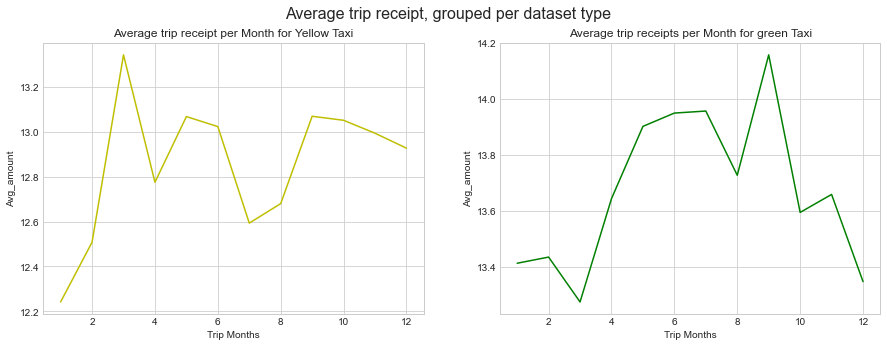

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df_y['Trip_Month'],df_y['tot_amount'],'y')
axs[0].set_title("Average trip receipt per Month for Yellow Taxi")
axs[1].plot(df_g['Trip_Month'],df_g['tot_amount'],'g')
axs[1].set_title("Average trip receipts per Month for green Taxi")


fig.suptitle('Average trip receipt, grouped per dataset type', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Avg_amount')

In [25]:
df_concat = pd.concat([df_y['tot_amount'], df_g['tot_amount']], axis=1)
df_concat.set_axis(["yellow", "green"], axis=1, inplace=True)
df_concat

,yellow,green
trip_month,,
1,12.242051,13.412304
2,12.508044,13.434301
3,13.343085,13.273912
4,12.775458,13.643298
5,13.067990,13.901637
6,13.023451,13.949189
7,12.593325,13.956435
8,12.680315,13.726910
9,13.069448,14.157358


### Average cost per in-progress-minute

In [26]:
df_green['drip_duration'] = (pd.to_datetime(df_green['lpep_dropoff_datetime']) - pd.to_datetime(df_green['lpep_pickup_datetime'])).astype('timedelta64[m]')
df_green['progress_avg_cost'] = df_green['tot_amount']/df_green['drip_duration']
df_green = df_green.replace([np.inf, -np.inf], np.nan)


In [27]:
df_g = df_green.groupby(['trip_month']).agg({'progress_avg_cost':'mean'})
df_g['Trip_Month']= df_g.index


In [28]:
df_yellow['drip_duration'] = abs(pd.to_datetime(df_yellow['tpep_pickup_datetime']) - pd.to_datetime(df_yellow['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_yellow['progress_avg_cost'] = df_yellow['tot_amount']/df_yellow['drip_duration']
df_yellow = df_yellow.replace([np.inf, -np.inf], np.nan)

In [29]:
df_y = df_yellow.groupby(['trip_month']).agg({'progress_avg_cost':'mean'})
df_y['Trip_Month']= df_y.index


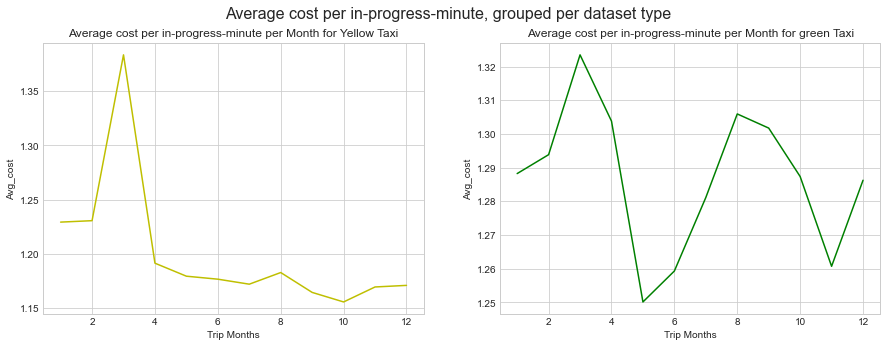

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df_y['Trip_Month'],df_y['progress_avg_cost'],'y')
axs[0].set_title("Average cost per in-progress-minute per Month for Yellow Taxi")
axs[1].plot(df_g['Trip_Month'],df_g['progress_avg_cost'],'g')
axs[1].set_title("Average cost per in-progress-minute per Month for green Taxi")


fig.suptitle('Average cost per in-progress-minute, grouped per dataset type', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Avg_cost')

In [31]:
df_concat = pd.concat([df_y['progress_avg_cost'], df_g['progress_avg_cost']], axis=1)
df_concat.set_axis(["yellow", "green"], axis=1, inplace=True)
df_concat

,yellow,green
trip_month,,
1,1.229206,1.288225
2,1.230523,1.293837
3,1.383369,1.323468
4,1.191345,1.303796
5,1.179356,1.250121
6,1.176605,1.259305
7,1.171993,1.281122
8,1.182731,1.305928
9,1.164409,1.301730


### Average tip per trip grouped per dataset type

In [32]:
df_y = df_yellow.groupby(['trip_month']).agg({'tip_amount':'mean'})
df_y['Trip_Month']= df_y.index

In [33]:
df_g = df_green.groupby(['trip_month']).agg({'tip_amount':'mean'})
df_g['Trip_Month']= df_g.index

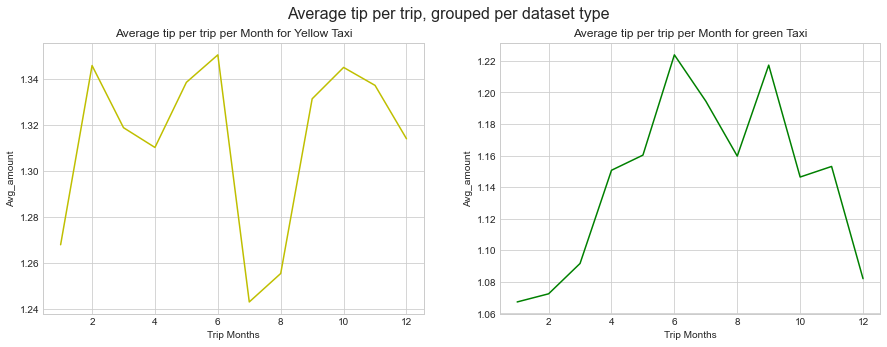

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df_y['Trip_Month'],df_y['tip_amount'],'y')
axs[0].set_title("Average tip per trip per Month for Yellow Taxi")
axs[1].plot(df_g['Trip_Month'],df_g['tip_amount'],'g')
axs[1].set_title("Average tip per trip per Month for green Taxi")


fig.suptitle('Average tip per trip, grouped per dataset type', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Avg_amount')

In [35]:
df_concat = pd.concat([df_y['tip_amount'], df_g['tip_amount']], axis=1)
df_concat.set_axis(["yellow", "green"], axis=1, inplace=True)
df_concat

,yellow,green
trip_month,,
1,1.267867,1.067211
2,1.345943,1.072369
3,1.318867,1.091592
4,1.310256,1.150647
5,1.338620,1.160241
6,1.350596,1.223774
7,1.242953,1.194431
8,1.255354,1.159619
9,1.331444,1.217257


### Median monthly average trip speed,  grouped per dataset type

In [36]:
df_value = pd.read_csv("C:\\Users\\ivomb\\Downloads\\taxi+_zone_lookup.csv")
df_value = df_value[df_value['Borough'].isin(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'])]
df_value.head()

,LocationID,Borough,Zone,service_zone
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone


In [37]:
df_g = df_green[df_green['pulocationid'].isin(df_value['LocationID'])]
df_g['drip_duration'] = (pd.to_datetime(df_g['lpep_dropoff_datetime']) - pd.to_datetime(df_g['lpep_pickup_datetime'])).astype('timedelta64[m]')
df_g['trip_speed'] = df_g['trip_distance']/df_g['drip_duration']
df_g = df_g.replace([np.inf, -np.inf], np.nan)

In [38]:
df_g = df_g.groupby(['trip_month']).agg({'trip_speed':'median'})
df_g['Trip_Month']= df_g.index


In [39]:
df_y = df_yellow[df_yellow['pulocationid'].isin(df_value['LocationID'])]
df_y['drip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y['trip_speed'] = df_y['trip_distance']/df_y['drip_duration']
df_y = df_y.replace([np.inf, -np.inf], np.nan)

In [40]:
df_y = df_y.groupby(['trip_month']).agg({'trip_speed':'median'})
df_y['Trip_Month']= df_y.index


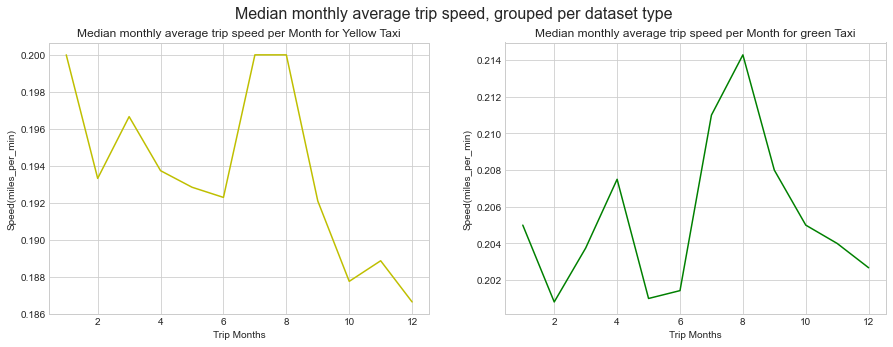

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df_y['Trip_Month'],df_y['trip_speed'],'y')
axs[0].set_title("Median monthly average trip speed per Month for Yellow Taxi")
axs[1].plot(df_g['Trip_Month'],df_g['trip_speed'],'g')
axs[1].set_title("Median monthly average trip speed per Month for green Taxi")


fig.suptitle('Median monthly average trip speed, grouped per dataset type', fontsize=16)

for ax in axs.flat:
    ax.set(xlabel='Trip Months', ylabel='Speed(miles_per_min)')

In [42]:
df_concat = pd.concat([df_y['trip_speed'], df_g['trip_speed']], axis=1)
df_concat.set_axis(["yellow", "green"], axis=1, inplace=True)
df_concat

,yellow,green
trip_month,,
1,0.200000,0.205000
2,0.193333,0.200811
3,0.196667,0.203750
4,0.193750,0.207500
5,0.192857,0.201000
6,0.192308,0.201429
7,0.200000,0.211000
8,0.200000,0.214286
9,0.192115,0.208000


### Time Taken to get to Newark Airport 

#### Start point: Manhattan Midtown (zones 161 - 164), Endpoint: Newark Airport (Zone 1)

In [43]:
# Start point: Manhattan Midtown (zones 161 - 164), Endpoint: Newark Airport (Zone 1)

time_bin = {'00:00-00:59':[], '01:00-01:59':[], '02:00-02:59':[], '03:00-03:59':[], '04:00-04:59':[], '05:00-05:59' :[], '06:00-06:59':[], \
           '07:00-07:59':[], '08:00-08:59':[], '09:00-09:59':[], '10:00-10:59':[], '11:00-11:59':[], '12:00-12:59':[], '13:00-13:59':[], \
           '14:00-14:59':[], '15:00-15:59':[], '16:00-16:59':[], '17:00-17:59':[], '18:00-18:59':[], '19:00-19:59':[], '20:00-20:59':[], \
           '21:00-21:59':[], '22:00-22:59':[], '23:00-23:59':[]}

# Yellow taxi starting at Manhattan midtown and ending at Newark Airport
df_y = df_yellow.query('pulocationid in ([161,162,163,164]) & dolocationid==1 ')
df_y['trip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y = df_y.reset_index()

# geen taxi starting at Manhattan midtown and ending at Newark Airport
df_g = df_green.query('pulocationid in ([161,162,163,164]) & dolocationid==1 ')
df_g['trip_duration'] = abs(pd.to_datetime(df_g['lpep_pickup_datetime']) - pd.to_datetime(df_g['lpep_dropoff_datetime'])).astype('timedelta64[m]')
df_g = df_g.reset_index()
# fhv taxi starting at Manhattan midtown and ending at Newark Airport
df_f = df_fhv.query('pulocationid in ([161,162,163,164]) & dolocationid==1 ')
df_f['trip_duration'] = abs(pd.to_datetime(df_f['pickup_datetime']) - pd.to_datetime(df_f['dropoff_datetime'])).astype('timedelta64[m]')
df_f = df_f.reset_index()
# fhv taxi starting at Manhattan midtown and ending at Newark Airport
df_fv = df_fhvhv.query('PULocationID in ([161,162,163,164]) & DOLocationID==1 ')
df_fv['trip_duration'] = abs(pd.to_datetime(df_fv['pickup_datetime']) - pd.to_datetime(df_fv['dropoff_datetime'])).astype('timedelta64[m]')
df_fv = df_fv.reset_index()

In [44]:
def drip_duration(df,start_time,end_time,time_bin):
    n = df.shape[0]
    df = df.reset_index()
    for i in range(n):
        if pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('00:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('00:59').strftime("%H:%M:%S")):
            time_bin['00:00-00:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('01:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('01:59').strftime("%H:%M:%S")):
            time_bin['01:00-01:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('02:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('02:59').strftime("%H:%M:%S")):
            time_bin['02:00-02:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('03:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('03:59').strftime("%H:%M:%S")):
            time_bin['03:00-03:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('04:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('04:59').strftime("%H:%M:%S")):
            time_bin['04:00-04:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('05:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('05:59').strftime("%H:%M:%S")):
            time_bin['05:00-05:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('06:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('06:59').strftime("%H:%M:%S")):
            time_bin['06:00-06:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('07:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('07:59').strftime("%H:%M:%S")):
            time_bin['07:00-07:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('08:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('08:59').strftime("%H:%M:%S")):
            time_bin['08:00-08:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('09:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('09:59').strftime("%H:%M:%S")):
            time_bin['09:00-09:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('10:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('10:59').strftime("%H:%M:%S")):
            time_bin['10:00-10:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('11:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('11:59').strftime("%H:%M:%S")):
            time_bin['11:00-11:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('12:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('12:59').strftime("%H:%M:%S")):
            time_bin['12:00-12:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('13:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('13:59').strftime("%H:%M:%S")):
            time_bin['13:00-13:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('14:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('14:59').strftime("%H:%M:%S")):
            time_bin['14:00-14:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('15:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('15:59').strftime("%H:%M:%S")):
            time_bin['15:00-15:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('16:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('16:59').strftime("%H:%M:%S")):
            time_bin['16:00-16:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('17:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('17:59').strftime("%H:%M:%S")):
            time_bin['17:00-17:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('18:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('18:59').strftime("%H:%M:%S")):
            time_bin['18:00-18:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('19:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('19:59').strftime("%H:%M:%S")):
            time_bin['19:00-19:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('20:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('20:59').strftime("%H:%M:%S")):
            time_bin['20:00-20:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('21:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('21:59').strftime("%H:%M:%S")):
            time_bin['21:00-21:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('22:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('22:59').strftime("%H:%M:%S")):
            time_bin['22:00-22:59'].append(df['trip_duration'][i])
        elif  pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime('23:00').strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime('23:59').strftime("%H:%M:%S")):
            time_bin['23:00-23:59'].append(df['trip_duration'][i])
    return time_bin

In [45]:
time_bin = drip_duration(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime',time_bin) # yellow trips to Newark Airport

In [46]:
time_bin = drip_duration(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime',time_bin) # green trips to Newark Airport

In [47]:
time_bin = drip_duration(df_f,'pickup_datetime', 'dropoff_datetime',time_bin) # fhv trips to Newark Airport

In [48]:
time_bin = drip_duration(df_fv,'pickup_datetime', 'pickup_datetime',time_bin) # fhvhv trips to Newark Airport

In [49]:
from statistics import median
x = []
y = []
time_bin_median = {}
for key in time_bin:
    if len(time_bin[key])>0:       
        x.append(median(time_bin[key]))
        y.append(key)
        time_bin_median[key]= median(time_bin[key])
       

In [50]:
sorted(time_bin_median.items(), key=lambda i: i[1]) 

[('05:00-05:59', 28.0),
 ('04:00-04:59', 28.5),
 ('03:00-03:59', 30.0),
 ('07:00-07:59', 31.0),
 ('06:00-06:59', 32.0),
 ('23:00-23:59', 32.0),
 ('09:00-09:59', 33.0),
 ('08:00-08:59', 34.0),
 ('10:00-10:59', 36.5),
 ('00:00-00:59', 37.0),
 ('11:00-11:59', 37.0),
 ('20:00-20:59', 37.0),
 ('21:00-21:59', 37.5),
 ('22:00-22:59', 38.0),
 ('12:00-12:59', 39.0),
 ('13:00-13:59', 39.0),
 ('19:00-19:59', 40.0),
 ('14:00-14:59', 44.0),
 ('15:00-15:59', 45.0),
 ('16:00-16:59', 45.5),
 ('18:00-18:59', 45.5),
 ('17:00-17:59', 47.0)]

#### Best time slot monthly trend

In [51]:

def time_slot(df,start_time,end_time,slot1,slot2):
    index_list = []
    n = df.shape[0]
    
    for i in range(n):
        if not(pd.to_datetime(pd.to_datetime(df[start_time][i]).strftime("%H:%M:%S")) >= pd.to_datetime(pd.to_datetime(slot1).strftime("%H:%M:%S")) \
        and pd.to_datetime(pd.to_datetime(df[end_time][i]).strftime("%H:%M:%S")) <= pd.to_datetime(pd.to_datetime(slot2).strftime("%H:%M:%S"))):
            index_list.append(i)
    return df.drop(index_list)        

In [52]:

df_y1 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '05:00', '05:59'))


In [53]:

df_g1 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '05:00', '05:59'))

In [54]:

df_f1 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '05:00', '05:59'))

In [55]:

df_fv1 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '05:00', '05:59'))


In [56]:
df_concat = pd.concat([df_y1[['trip_month','trip_duration']],df_g1[['trip_month','trip_duration']],\
                      df_f1[['trip_month','trip_duration']], df_fv1[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,29.5,1
3,30.0,3
4,27.0,4
5,28.0,5
6,21.0,6
7,28.0,7
8,30.0,8
9,27.5,9
10,32.0,10


Text(0, 0.5, 'Trip duration')

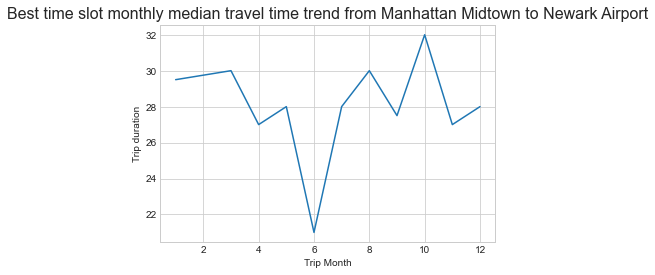

In [57]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Best time slot monthly median travel time trend from Manhattan Midtown to Newark Airport',fontsize=16)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Worst time slot monthly trend

In [58]:
df_y2 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '17:00', '17:59'))

In [59]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '17:00', '17:59'))

In [60]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '17:00', '17:59'))

In [61]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '17:00', '17:59'))

In [62]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,37.0,1
2,46.0,2
3,33.5,3
5,38.0,5
7,36.0,7
8,39.5,8
10,42.5,10
11,48.5,11


Text(0, 0.5, 'Trip duration')

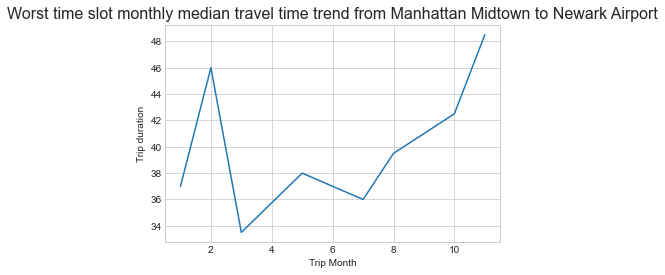

In [63]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Worst time slot monthly median travel time trend from Manhattan Midtown to Newark Airport',fontsize=16)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Start point: Chelsea (zones 68, 246), Endpoint: Newark Airport (Zone 1)

In [64]:
# Start point:  Chelsea (zones 68, 246), Endpoint: Newark Airport (Zone 1)

time_bin2 = {'00:00-00:59':[], '01:00-01:59':[], '02:00-02:59':[], '03:00-03:59':[], '04:00-04:59':[], '05:00-05:59' :[], '06:00-06:59':[], \
           '07:00-07:59':[], '08:00-08:59':[], '09:00-09:59':[], '10:00-10:59':[], '11:00-11:59':[], '12:00-12:59':[], '13:00-13:59':[], \
           '14:00-14:59':[], '15:00-15:59':[], '16:00-16:59':[], '17:00-17:59':[], '18:00-18:59':[], '19:00-19:59':[], '20:00-20:59':[], \
           '21:00-21:59':[], '22:00-22:59':[], '23:00-23:59':[]}

# Yellow taxi
df_y = df_yellow.query('pulocationid in ([68, 246]) & dolocationid==1 ')
df_y['trip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y = df_y.reset_index()

# geen taxi 
df_g = df_green.query('pulocationid in ([68, 246]) & dolocationid==1 ')
df_g['trip_duration'] = abs(pd.to_datetime(df_g['lpep_pickup_datetime']) - pd.to_datetime(df_g['lpep_dropoff_datetime'])).astype('timedelta64[m]')
df_g = df_g.reset_index()

# fhv taxi starting 
df_f = df_fhv.query('pulocationid in ([68, 246]) & dolocationid==1 ')
df_f['trip_duration'] = abs(pd.to_datetime(df_f['pickup_datetime']) - pd.to_datetime(df_f['dropoff_datetime'])).astype('timedelta64[m]')
df_f = df_f.reset_index()

# fhv taxi starting
df_fv = df_fhvhv.query('PULocationID in ([68, 246]) & DOLocationID==1 ')
df_fv['trip_duration'] = abs(pd.to_datetime(df_fv['pickup_datetime']) - pd.to_datetime(df_fv['dropoff_datetime'])).astype('timedelta64[m]')
df_fv = df_fv.reset_index()

In [65]:
time_bin2 = drip_duration(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime',time_bin2) # yellow trips to Newark Airport

In [66]:
time_bin2 = drip_duration(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime',time_bin2) # green trips to Newark Airport

In [67]:
time_bin2 = drip_duration(df_f,'pickup_datetime', 'dropoff_datetime',time_bin2) # fhv trips to Newark Airport

In [68]:
time_bin2 = drip_duration(df_fv,'pickup_datetime', 'pickup_datetime',time_bin2) # fhvhv trips to Newark Airport

In [69]:
from statistics import median
x2 = []
y2 = []
time_bin_median2 = {}
for key in time_bin2:
    if len(time_bin2[key])>0:       
        x2.append(median(time_bin2[key]))
        y2.append(key)
        time_bin_median2[key]= median(time_bin2[key])
       

In [70]:
sorted(time_bin_median2.items(), key=lambda i: i[1]) 

[('02:00-02:59', 23.0),
 ('05:00-05:59', 23.5),
 ('03:00-03:59', 24.5),
 ('20:00-20:59', 24.5),
 ('04:00-04:59', 25.5),
 ('06:00-06:59', 26.0),
 ('23:00-23:59', 26.0),
 ('09:00-09:59', 28.0),
 ('12:00-12:59', 28.0),
 ('13:00-13:59', 28.5),
 ('21:00-21:59', 28.5),
 ('10:00-10:59', 29.0),
 ('07:00-07:59', 29.5),
 ('11:00-11:59', 31.0),
 ('22:00-22:59', 31.0),
 ('19:00-19:59', 31.5),
 ('14:00-14:59', 32.0),
 ('08:00-08:59', 33.0),
 ('15:00-15:59', 36.0),
 ('18:00-18:59', 39.0),
 ('17:00-17:59', 40.0),
 ('16:00-16:59', 43.0)]

#### Best Time Slot

In [71]:
df_y1 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '05:00', '05:59'))


In [72]:
df_g1 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '05:00', '05:59'))

In [73]:
df_f1 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '05:00', '05:59'))

In [74]:
df_fv1 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '05:00', '05:59'))


In [75]:
df_concat = pd.concat([df_y1[['trip_month','trip_duration']],df_g1[['trip_month','trip_duration']],\
                      df_f1[['trip_month','trip_duration']], df_fv1[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
3,25.0,3
4,23.0,4
5,17.0,5
6,23.5,6
7,23.0,7
8,24.0,8
10,24.5,10
11,28.0,11


Text(0, 0.5, 'Trip duration')

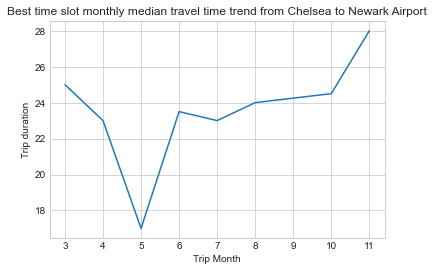

In [76]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Best time slot monthly median travel time trend from Chelsea to Newark Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Worst time slot monthly trend

In [77]:
df_y2 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '16:00', '16:59'))

In [78]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '18:00', '18:59'))

In [79]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '18:00', '18:59'))

In [80]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '18:00', '18:59'))

In [81]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,28.0,1
4,37.0,4
5,27.0,5
8,24.0,8


Text(0, 0.5, 'Trip duration')

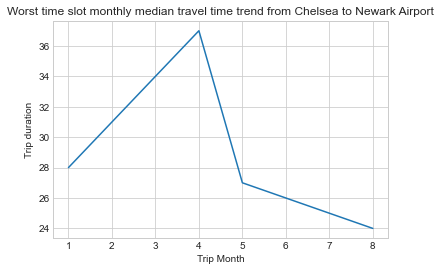

In [82]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Worst time slot monthly median travel time trend from Chelsea to Newark Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Start point: Times Squeare (zone 230) or Garment District (zone 100), Endpoint: Newark Airport (Zone 1)

In [83]:
# Start point: Times Squeare (zone 230) or Garment District (zone 100), Endpoint: Newark Airport (Zone 1)

time_bin3 = {'00:00-00:59':[], '01:00-01:59':[], '02:00-02:59':[], '03:00-03:59':[], '04:00-04:59':[], '05:00-05:59' :[], '06:00-06:59':[], \
           '07:00-07:59':[], '08:00-08:59':[], '09:00-09:59':[], '10:00-10:59':[], '11:00-11:59':[], '12:00-12:59':[], '13:00-13:59':[], \
           '14:00-14:59':[], '15:00-15:59':[], '16:00-16:59':[], '17:00-17:59':[], '18:00-18:59':[], '19:00-19:59':[], '20:00-20:59':[], \
           '21:00-21:59':[], '22:00-22:59':[], '23:00-23:59':[]}

# Yellow taxi 
df_y = df_yellow.query('pulocationid in ([230, 100]) & dolocationid==1 ')
df_y['trip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y = df_y.reset_index()

# geen taxi 
df_g = df_green.query('pulocationid in ([230, 100]) & dolocationid==1 ')
df_g['trip_duration'] = abs(pd.to_datetime(df_g['lpep_pickup_datetime']) - pd.to_datetime(df_g['lpep_dropoff_datetime'])).astype('timedelta64[m]')
df_g = df_g.reset_index()

# fhv taxi 
df_f = df_fhv.query('pulocationid in ([230, 100]) & dolocationid==1 ')
df_f['trip_duration'] = abs(pd.to_datetime(df_f['pickup_datetime']) - pd.to_datetime(df_f['dropoff_datetime'])).astype('timedelta64[m]')
df_f = df_f.reset_index()

# fhv taxi 
df_fv = df_fhvhv.query('PULocationID in ([230, 100]) & DOLocationID==1 ')
df_fv['trip_duration'] = abs(pd.to_datetime(df_fv['pickup_datetime']) - pd.to_datetime(df_fv['dropoff_datetime'])).astype('timedelta64[m]')
df_fv = df_fv.reset_index()

In [84]:
time_bin3 = drip_duration(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime',time_bin3) # yellow trips to Newark Airport

In [85]:
df_y.query('trip_duration>800')

,index,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_month,tot_amount,drip_duration,progress_avg_cost,trip_duration
292,2152509,2,2015-06-19 08:43:16,2015-06-20 00:00:00,1.0,20.72,3.0,N,230.0,1.0,...,14.08,16.05,0.3,107.93,0.0,6,93.85,916.0,0.102456,916.0
446,2837024,2,2018-04-08 13:07:01,2018-04-09 12:34:51,1.0,17.54,3.0,N,230.0,1.0,...,0.00,17.40,0.3,83.70,0.0,4,83.70,1407.0,0.059488,1407.0


##### N.B. The two outlier trip left Manhattan borough area to  Newark Airport which is located in a different borough area

In [86]:
time_bin3 = drip_duration(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime',time_bin3) # green trips to Newark Airport

In [87]:
time_bin3 = drip_duration(df_f,'pickup_datetime', 'dropoff_datetime',time_bin3) # fhv trips to Newark Airport

In [88]:
time_bin3 = drip_duration(df_fv,'pickup_datetime', 'pickup_datetime',time_bin3) # fhvhv trips to Newark Airport

In [89]:
from statistics import median
x3 = []
y3 = []
time_bin_median3 = {}
for key in time_bin3:
    if len(time_bin3[key])>0:       
        x3.append(median(time_bin3[key]))
        y3.append(key)
        time_bin_median3[key]= median(time_bin3[key])

In [90]:
sorted(time_bin_median3.items(),key=lambda i: i[1]) 

[('03:00-03:59', 24.0),
 ('23:00-23:59', 26.0),
 ('04:00-04:59', 27.0),
 ('06:00-06:59', 27.0),
 ('05:00-05:59', 28.0),
 ('07:00-07:59', 30.0),
 ('19:00-19:59', 30.5),
 ('08:00-08:59', 31.0),
 ('11:00-11:59', 31.0),
 ('20:00-20:59', 31.0),
 ('21:00-21:59', 31.0),
 ('13:00-13:59', 32.0),
 ('22:00-22:59', 32.0),
 ('10:00-10:59', 33.0),
 ('14:00-14:59', 33.5),
 ('09:00-09:59', 34.0),
 ('12:00-12:59', 35.0),
 ('15:00-15:59', 37.0),
 ('02:00-02:59', 38.0),
 ('18:00-18:59', 40.0),
 ('17:00-17:59', 42.0),
 ('16:00-16:59', 44.0),
 ('00:00-00:59', 835.5)]

#### Best Time Slot

In [91]:
df_y1 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '03:00', '03:59'))

In [92]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '03:00', '03:59'))

In [93]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '03:00', '03:59'))

In [94]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '03:00', '03:59'))

In [95]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,28.0,1
4,37.0,4
5,24.5,5
6,24.0,6
7,25.0,7
8,23.5,8
11,28.0,11


Text(0, 0.5, 'Trip duration')

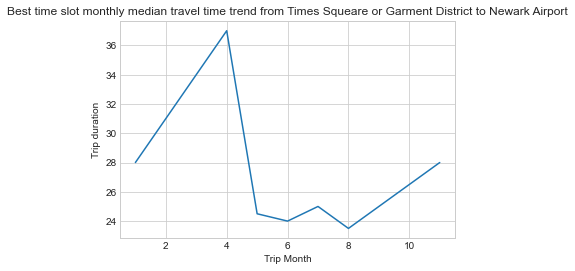

In [96]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Best time slot monthly median travel time trend from Times Squeare or Garment District to Newark Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Worst time slot monthly trend

#### Eventhough the worst time slot indicates '00:00-00:59', 835.5. I think its an outlier. so '16:00-16:59', 44.0 is considered

In [97]:
df_y2 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '16:00', '16:59'))

In [98]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '16:00', '16:59'))

In [99]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '16:00', '16:59'))

In [100]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '16:00', '16:59'))

In [101]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,27.0,1
2,51.0,2
3,35.5,3
4,40.0,4
6,29.0,6
8,38.0,8
9,27.0,9
10,45.0,10
11,42.0,11


Text(0, 0.5, 'Trip duration')

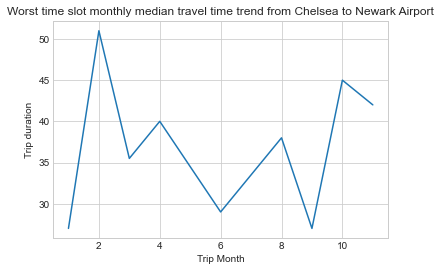

In [102]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Worst time slot monthly median travel time trend from Chelsea to Newark Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

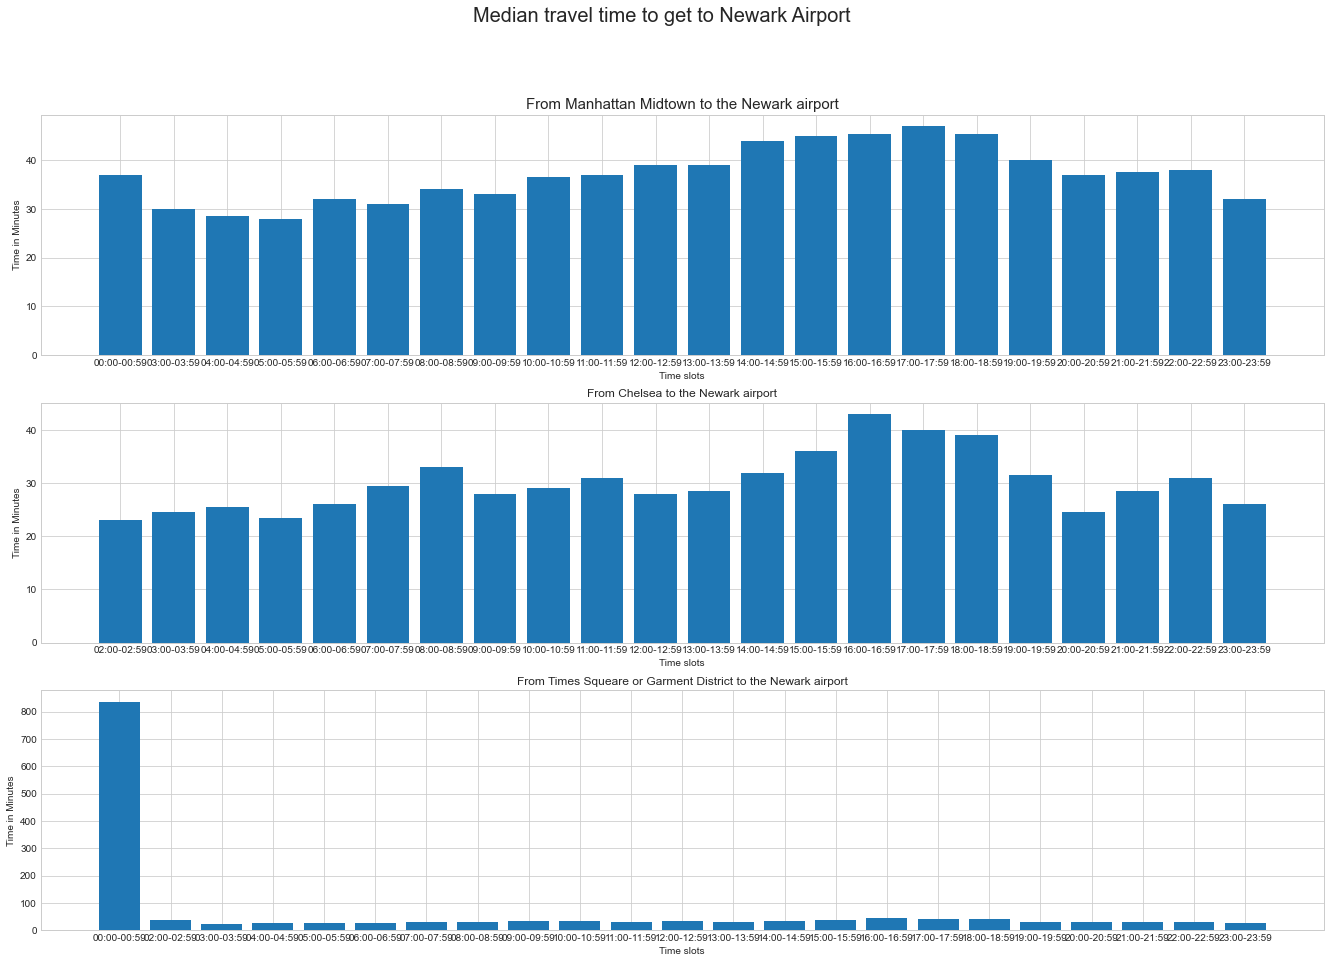

In [103]:
fig, axs = plt.subplots(3, 1, figsize=(23,15))
axs[0].bar(y,x)
axs[0].set_title('From Manhattan Midtown to the Newark airport', fontsize=15)
axs[1].bar(y2,x2)
axs[1].set_title("From Chelsea to the Newark airport")
axs[2].bar(y3,x3)
axs[2].set_title("From Times Squeare or Garment District to the Newark airport")

fig.suptitle('Median travel time to get to Newark Airport', fontsize=20)

for ax in axs.flat:
    ax.set(xlabel='Time slots', ylabel='Time in Minutes')

### Time Taken to get to JFK Airport 

#### Start point: Manhattan Midtown (zones 161 - 164), Endpoint: JFK Airport (Zone 132)

In [104]:


time_bin = {'00:00-00:59':[], '01:00-01:59':[], '02:00-02:59':[], '03:00-03:59':[], '04:00-04:59':[], '05:00-05:59' :[], '06:00-06:59':[], \
           '07:00-07:59':[], '08:00-08:59':[], '09:00-09:59':[], '10:00-10:59':[], '11:00-11:59':[], '12:00-12:59':[], '13:00-13:59':[], \
           '14:00-14:59':[], '15:00-15:59':[], '16:00-16:59':[], '17:00-17:59':[], '18:00-18:59':[], '19:00-19:59':[], '20:00-20:59':[], \
           '21:00-21:59':[], '22:00-22:59':[], '23:00-23:59':[]}

# Yellow taxi starting at Manhattan midtown and ending at JFK Airport
df_y = df_yellow.query('pulocationid in ([161,162,163,164]) & dolocationid==132 ')
df_y['trip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y = df_y.reset_index()

# geen taxi starting at Manhattan midtown and ending at Newark Airport
df_g = df_green.query('pulocationid in ([161,162,163,164]) & dolocationid==132 ')
df_g['trip_duration'] = abs(pd.to_datetime(df_g['lpep_pickup_datetime']) - pd.to_datetime(df_g['lpep_dropoff_datetime'])).astype('timedelta64[m]')
df_g = df_g.reset_index()
# fhv taxi starting at Manhattan midtown and ending at Newark Airport
df_f = df_fhv.query('pulocationid in ([161,162,163,164]) & dolocationid==132 ')
df_f['trip_duration'] = abs(pd.to_datetime(df_f['pickup_datetime']) - pd.to_datetime(df_f['dropoff_datetime'])).astype('timedelta64[m]')
df_f = df_f.reset_index()
# fhv taxi starting at Manhattan midtown and ending at Newark Airport
df_fv = df_fhvhv.query('PULocationID in ([161,162,163,164]) & DOLocationID==132 ')
df_fv['trip_duration'] = abs(pd.to_datetime(df_fv['pickup_datetime']) - pd.to_datetime(df_fv['dropoff_datetime'])).astype('timedelta64[m]')
df_fv = df_fv.reset_index()

In [105]:
time_bin = drip_duration(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime',time_bin) # yellow trips to JFK Airport

In [106]:
time_bin = drip_duration(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime',time_bin) # green trips to JFK Airport

In [107]:
time_bin = drip_duration(df_f,'pickup_datetime', 'dropoff_datetime',time_bin) # fhv trips to JFK Airport

In [108]:
time_bin = drip_duration(df_fv,'pickup_datetime', 'pickup_datetime',time_bin) # fhvhv trips to JFK Airport

In [109]:
from statistics import median
x = []
y = []
time_bin_median = {}
for key in time_bin:
    if len(time_bin[key])>0:       
        x.append(median(time_bin[key]))
        y.append(key)
        time_bin_median[key]= median(time_bin[key])

In [110]:
sorted(time_bin_median.items(), key=lambda i: i[1]) 

[('01:00-01:59', 12.0),
 ('03:00-03:59', 25.0),
 ('04:00-04:59', 26.0),
 ('05:00-05:59', 26.0),
 ('02:00-02:59', 27.0),
 ('06:00-06:59', 29.0),
 ('23:00-23:59', 30.0),
 ('00:00-00:59', 31.0),
 ('07:00-07:59', 31.0),
 ('11:00-11:59', 31.0),
 ('08:00-08:59', 32.0),
 ('10:00-10:59', 32.0),
 ('09:00-09:59', 33.0),
 ('12:00-12:59', 34.5),
 ('22:00-22:59', 35.0),
 ('20:00-20:59', 35.5),
 ('21:00-21:59', 37.0),
 ('13:00-13:59', 38.0),
 ('18:00-18:59', 39.0),
 ('19:00-19:59', 40.0),
 ('14:00-14:59', 42.0),
 ('15:00-15:59', 45.0),
 ('17:00-17:59', 47.5),
 ('16:00-16:59', 51.0)]

#### Best time slot monthly trend

In [111]:

df_y1 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '01:00', '01:59'))


In [112]:
df_g1 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '01:00', '01:59'))

In [113]:
df_f1 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '01:00', '01:59'))

In [114]:
df_fv1 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '01:00', '01:59'))

In [115]:
df_concat = pd.concat([df_y1[['trip_month','trip_duration']],df_g1[['trip_month','trip_duration']],\
                      df_f1[['trip_month','trip_duration']], df_fv1[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,29.0,1
9,17.0,9


Text(0, 0.5, 'Trip duration')

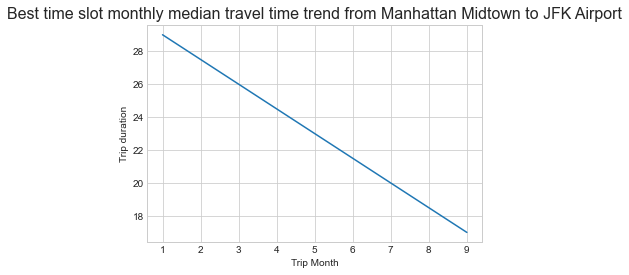

In [116]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Best time slot monthly median travel time trend from Manhattan Midtown to JFK Airport',fontsize=16)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Worst time slot monthly trend

In [117]:
df_y2 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '16:00', '16:59'))

In [118]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '16:00', '16:59'))

In [119]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '16:00', '16:59'))

In [120]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '16:00', '16:59'))

In [121]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,29.0,1
2,46.0,2
3,45.0,3
4,41.0,4
6,49.0,6
7,50.5,7
8,47.5,8
9,28.5,9
10,48.0,10


Text(0, 0.5, 'Trip duration')

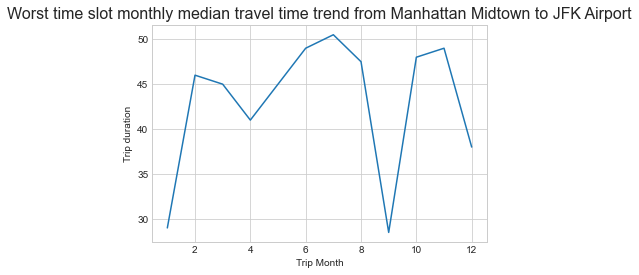

In [122]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Worst time slot monthly median travel time trend from Manhattan Midtown to JFK Airport',fontsize=16)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Start point: Chelsea (zones 68, 246), Endpoint: JFK Airport (Zone 132)

In [123]:
time_bin2 = {'00:00-00:59':[], '01:00-01:59':[], '02:00-02:59':[], '03:00-03:59':[], '04:00-04:59':[], '05:00-05:59' :[], '06:00-06:59':[], \
           '07:00-07:59':[], '08:00-08:59':[], '09:00-09:59':[], '10:00-10:59':[], '11:00-11:59':[], '12:00-12:59':[], '13:00-13:59':[], \
           '14:00-14:59':[], '15:00-15:59':[], '16:00-16:59':[], '17:00-17:59':[], '18:00-18:59':[], '19:00-19:59':[], '20:00-20:59':[], \
           '21:00-21:59':[], '22:00-22:59':[], '23:00-23:59':[]}

# Yellow taxi
df_y = df_yellow.query('pulocationid in ([68, 246]) & dolocationid==132 ')
df_y['trip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y = df_y.reset_index()

# geen taxi 
df_g = df_green.query('pulocationid in ([68, 246]) & dolocationid==132 ')
df_g['trip_duration'] = abs(pd.to_datetime(df_g['lpep_pickup_datetime']) - pd.to_datetime(df_g['lpep_dropoff_datetime'])).astype('timedelta64[m]')
df_g = df_g.reset_index()

# fhv taxi starting 
df_f = df_fhv.query('pulocationid in ([68, 246]) & dolocationid==132 ')
df_f['trip_duration'] = abs(pd.to_datetime(df_f['pickup_datetime']) - pd.to_datetime(df_f['dropoff_datetime'])).astype('timedelta64[m]')
df_f = df_f.reset_index()

# fhv taxi starting
df_fv = df_fhvhv.query('PULocationID in ([68, 246]) & DOLocationID==132 ')
df_fv['trip_duration'] = abs(pd.to_datetime(df_fv['pickup_datetime']) - pd.to_datetime(df_fv['dropoff_datetime'])).astype('timedelta64[m]')
df_fv = df_fv.reset_index()

In [124]:
time_bin2 = drip_duration(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime',time_bin2)

In [125]:
time_bin2 = drip_duration(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime',time_bin2)

In [126]:
time_bin2 = drip_duration(df_f,'pickup_datetime', 'dropoff_datetime',time_bin2)

In [127]:
time_bin2 = drip_duration(df_fv,'pickup_datetime', 'pickup_datetime',time_bin2)

In [128]:
from statistics import median
x2 = []
y2 = []
time_bin_median2 = {}
for key in time_bin2:
    if len(time_bin2[key])>0:       
        x2.append(median(time_bin2[key]))
        y2.append(key)
        time_bin_median2[key]= median(time_bin2[key])

In [129]:
sorted(time_bin_median2.items(), key=lambda i: i[1])

[('22:00-22:59', 23.0),
 ('04:00-04:59', 29.5),
 ('23:00-23:59', 30.0),
 ('05:00-05:59', 31.0),
 ('03:00-03:59', 33.0),
 ('06:00-06:59', 33.0),
 ('09:00-09:59', 35.0),
 ('02:00-02:59', 37.0),
 ('11:00-11:59', 37.0),
 ('20:00-20:59', 38.0),
 ('21:00-21:59', 38.0),
 ('07:00-07:59', 39.0),
 ('00:00-00:59', 41.0),
 ('12:00-12:59', 41.0),
 ('13:00-13:59', 43.5),
 ('10:00-10:59', 46.0),
 ('08:00-08:59', 47.0),
 ('19:00-19:59', 47.0),
 ('17:00-17:59', 53.0),
 ('14:00-14:59', 54.0),
 ('18:00-18:59', 55.0),
 ('16:00-16:59', 57.5),
 ('15:00-15:59', 73.0)]

#### Best Time Slot

In [130]:
df_y1 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '22:00', '22:59'))

In [131]:
df_g1 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '22:00', '22:59'))

In [132]:
df_f1 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '22:00', '22:59'))

In [133]:
df_fv1 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '22:00', '22:59'))

In [134]:
df_concat = pd.concat([df_y1[['trip_month','trip_duration']],df_g1[['trip_month','trip_duration']],\
                      df_f1[['trip_month','trip_duration']], df_fv1[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
8,23.0,8
9,43.0,9


Text(0, 0.5, 'Trip duration')

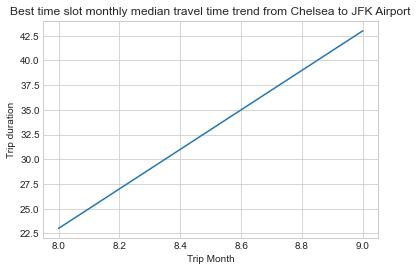

In [135]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Best time slot monthly median travel time trend from Chelsea to JFK Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Worst time slot monthly trend

In [136]:
df_y2 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '15:00', '15:59'))

In [137]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '15:00', '15:59'))

In [138]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '15:00', '15:59'))

In [139]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '15:00', '15:59'))

In [140]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
4,41.0,4
5,54.0,5
7,37.0,7
9,43.0,9
10,52.0,10


Text(0, 0.5, 'Trip duration')

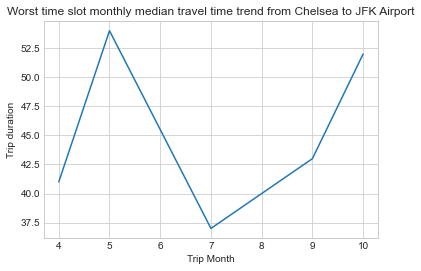

In [141]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Worst time slot monthly median travel time trend from Chelsea to JFK Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Start point: Times Squeare (zone 230) or Garment District (zone 100), Endpoint: JFK Airport (Zone 132)

In [142]:
time_bin3 = {'00:00-00:59':[], '01:00-01:59':[], '02:00-02:59':[], '03:00-03:59':[], '04:00-04:59':[], '05:00-05:59' :[], '06:00-06:59':[], \
           '07:00-07:59':[], '08:00-08:59':[], '09:00-09:59':[], '10:00-10:59':[], '11:00-11:59':[], '12:00-12:59':[], '13:00-13:59':[], \
           '14:00-14:59':[], '15:00-15:59':[], '16:00-16:59':[], '17:00-17:59':[], '18:00-18:59':[], '19:00-19:59':[], '20:00-20:59':[], \
           '21:00-21:59':[], '22:00-22:59':[], '23:00-23:59':[]}

# Yellow taxi 
df_y = df_yellow.query('pulocationid in ([230, 100]) & dolocationid==132 ')
df_y['trip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y = df_y.reset_index()

# geen taxi 
df_g = df_green.query('pulocationid in ([230, 100]) & dolocationid==132 ')
df_g['trip_duration'] = abs(pd.to_datetime(df_g['lpep_pickup_datetime']) - pd.to_datetime(df_g['lpep_dropoff_datetime'])).astype('timedelta64[m]')
df_g = df_g.reset_index()

# fhv taxi 
df_f = df_fhv.query('pulocationid in ([230, 100]) & dolocationid==132 ')
df_f['trip_duration'] = abs(pd.to_datetime(df_f['pickup_datetime']) - pd.to_datetime(df_f['dropoff_datetime'])).astype('timedelta64[m]')
df_f = df_f.reset_index()

# fhv taxi 
df_fv = df_fhvhv.query('PULocationID in ([230, 100]) & DOLocationID==132 ')
df_fv['trip_duration'] = abs(pd.to_datetime(df_fv['pickup_datetime']) - pd.to_datetime(df_fv['dropoff_datetime'])).astype('timedelta64[m]')
df_fv = df_fv.reset_index()

In [143]:
time_bin3 = drip_duration(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime',time_bin3)

In [144]:
time_bin3 = drip_duration(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime',time_bin3)

In [145]:
time_bin3 = drip_duration(df_f,'pickup_datetime', 'dropoff_datetime',time_bin3)

In [146]:
time_bin3 = drip_duration(df_fv,'pickup_datetime', 'pickup_datetime',time_bin3)

In [147]:
from statistics import median
x3 = []
y3 = []
time_bin_median3 = {}
for key in time_bin3:
    if len(time_bin3[key])>0:       
        x3.append(median(time_bin3[key]))
        y3.append(key)
        time_bin_median3[key]= median(time_bin3[key])

In [148]:
sorted(time_bin_median3.items(),key=lambda i: i[1]) 

[('00:00-00:59', 14.5),
 ('01:00-01:59', 25.0),
 ('02:00-02:59', 26.0),
 ('04:00-04:59', 27.5),
 ('03:00-03:59', 28.0),
 ('05:00-05:59', 28.0),
 ('06:00-06:59', 32.0),
 ('23:00-23:59', 33.0),
 ('08:00-08:59', 34.0),
 ('11:00-11:59', 35.0),
 ('10:00-10:59', 35.5),
 ('09:00-09:59', 36.5),
 ('07:00-07:59', 37.0),
 ('22:00-22:59', 37.0),
 ('20:00-20:59', 38.0),
 ('21:00-21:59', 38.0),
 ('12:00-12:59', 38.5),
 ('13:00-13:59', 39.0),
 ('19:00-19:59', 43.0),
 ('14:00-14:59', 45.0),
 ('18:00-18:59', 46.0),
 ('16:00-16:59', 50.0),
 ('17:00-17:59', 51.0),
 ('15:00-15:59', 52.5)]

#### Best Time Slot

In [149]:
df_y1 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '00:00', '00:59'))

In [150]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '0:00', '00:59'))

In [151]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '00:00', '00:59'))

In [152]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '00:00', '00:59'))

In [153]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
2,68.0,2
4,41.0,4
5,54.0,5
7,37.0,7
9,41.0,9
10,52.0,10


Text(0, 0.5, 'Trip duration')

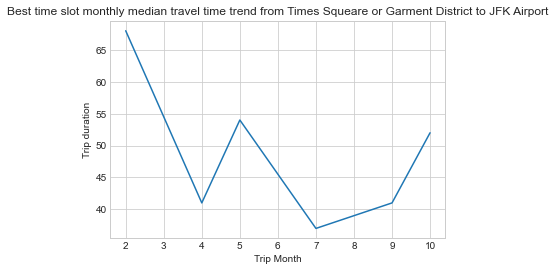

In [154]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Best time slot monthly median travel time trend from Times Squeare or Garment District to JFK Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Worst time slot monthly trend

In [155]:
df_y2 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '15:00', '15:59'))

In [156]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '15:00', '15:59'))

In [157]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '15:00', '15:59'))

In [158]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '15:00', '15:59'))

In [159]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,46.5,1
2,55.5,2
4,49.0,4
6,35.0,6
7,44.5,7
8,40.0,8
9,12.0,9
10,49.0,10
11,54.0,11


Text(0, 0.5, 'Trip duration')

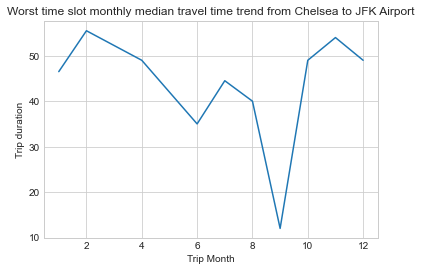

In [160]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Worst time slot monthly median travel time trend from Chelsea to JFK Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

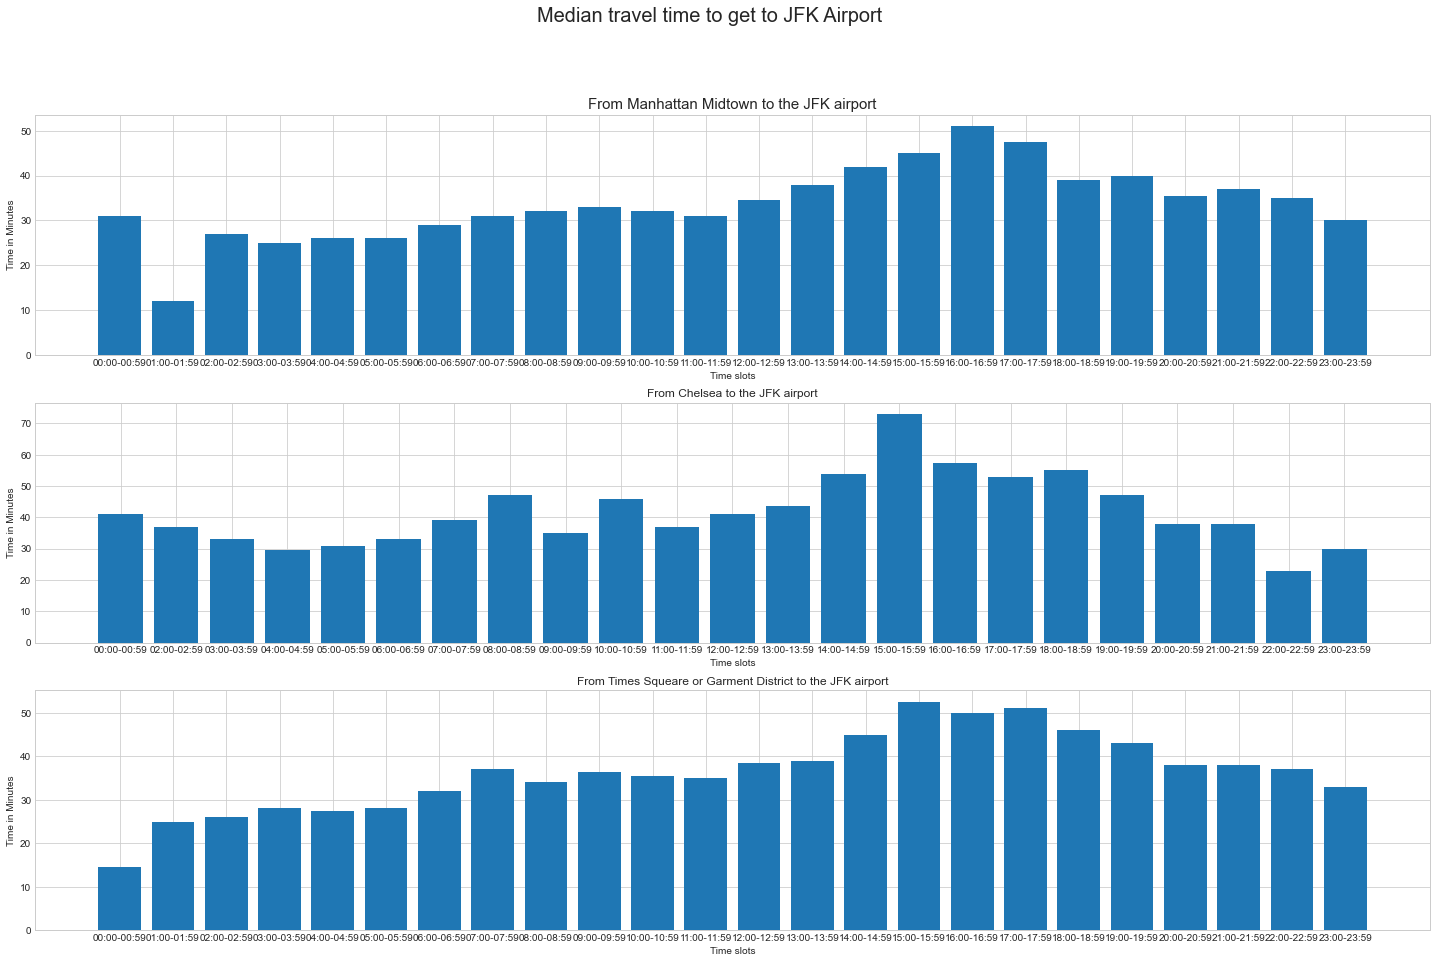

In [161]:
fig, axs = plt.subplots(3, 1, figsize=(25,15))
axs[0].bar(y,x)
axs[0].set_title('From Manhattan Midtown to the JFK airport', fontsize=15)
axs[1].bar(y2,x2)
axs[1].set_title("From Chelsea to the JFK airport")
axs[2].bar(y3,x3)
axs[2].set_title("From Times Squeare or Garment District to the JFK airport")

fig.suptitle('Median travel time to get to JFK Airport', fontsize=20)

for ax in axs.flat:
    ax.set(xlabel='Time slots', ylabel='Time in Minutes')

### Time Taken to get to LaGuardia Airport

#### Start point: Manhattan Midtown (zones 161 - 164), Endpoint: LaGuardia (Zone 138)

In [162]:

time_bin = {'00:00-00:59':[], '01:00-01:59':[], '02:00-02:59':[], '03:00-03:59':[], '04:00-04:59':[], '05:00-05:59' :[], '06:00-06:59':[], \
           '07:00-07:59':[], '08:00-08:59':[], '09:00-09:59':[], '10:00-10:59':[], '11:00-11:59':[], '12:00-12:59':[], '13:00-13:59':[], \
           '14:00-14:59':[], '15:00-15:59':[], '16:00-16:59':[], '17:00-17:59':[], '18:00-18:59':[], '19:00-19:59':[], '20:00-20:59':[], \
           '21:00-21:59':[], '22:00-22:59':[], '23:00-23:59':[]}

# Yellow taxi starting at Manhattan midtown and ending at Newark Airport
df_y = df_yellow.query('pulocationid in ([161,162,163,164]) & dolocationid==138 ')
df_y['trip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y = df_y.reset_index()

# geen taxi starting at Manhattan midtown and ending at Newark Airport
df_g = df_green.query('pulocationid in ([161,162,163,164]) & dolocationid==138 ')
df_g['trip_duration'] = abs(pd.to_datetime(df_g['lpep_pickup_datetime']) - pd.to_datetime(df_g['lpep_dropoff_datetime'])).astype('timedelta64[m]')
df_g = df_g.reset_index()
# fhv taxi starting at Manhattan midtown and ending at Newark Airport
df_f = df_fhv.query('pulocationid in ([161,162,163,164]) & dolocationid==138 ')
df_f['trip_duration'] = abs(pd.to_datetime(df_f['pickup_datetime']) - pd.to_datetime(df_f['dropoff_datetime'])).astype('timedelta64[m]')
df_f = df_f.reset_index()
# fhv taxi starting at Manhattan midtown and ending at Newark Airport
df_fv = df_fhvhv.query('PULocationID in ([161,162,163,164]) & DOLocationID==138 ')
df_fv['trip_duration'] = abs(pd.to_datetime(df_fv['pickup_datetime']) - pd.to_datetime(df_fv['dropoff_datetime'])).astype('timedelta64[m]')
df_fv = df_fv.reset_index() 

In [163]:
time_bin = drip_duration(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime',time_bin)

In [164]:
time_bin = drip_duration(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime',time_bin)

In [165]:
time_bin = drip_duration(df_f,'pickup_datetime', 'dropoff_datetime',time_bin)

In [166]:
time_bin = drip_duration(df_fv,'pickup_datetime', 'pickup_datetime',time_bin)

In [167]:
from statistics import median
x = []
y = []
time_bin_median = {}
for key in time_bin:
    if len(time_bin[key])>0:       
        x.append(median(time_bin[key]))
        y.append(key)
        time_bin_median[key]= median(time_bin[key])
       

In [168]:
sorted(time_bin_median.items(), key=lambda i: i[1]) 

[('23:00-23:59', 14.0),
 ('00:00-00:59', 17.0),
 ('02:00-02:59', 18.5),
 ('04:00-04:59', 19.0),
 ('05:00-05:59', 19.0),
 ('03:00-03:59', 20.0),
 ('06:00-06:59', 21.0),
 ('22:00-22:59', 21.0),
 ('01:00-01:59', 22.0),
 ('08:00-08:59', 22.0),
 ('20:00-20:59', 22.0),
 ('07:00-07:59', 23.0),
 ('09:00-09:59', 24.0),
 ('10:00-10:59', 24.0),
 ('11:00-11:59', 24.0),
 ('12:00-12:59', 24.0),
 ('19:00-19:59', 24.0),
 ('13:00-13:59', 26.0),
 ('14:00-14:59', 27.0),
 ('18:00-18:59', 27.0),
 ('15:00-15:59', 29.0),
 ('21:00-21:59', 29.0),
 ('16:00-16:59', 31.0),
 ('17:00-17:59', 32.0)]

#### Best time slot monthly trend

In [169]:

df_y1 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '23:00', '23:59'))


In [170]:

df_g1 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '23:00', '23:59'))

In [171]:

df_f1 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '23:00', '23:59'))

In [172]:

df_fv1 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '23:00', '23:59'))

In [173]:
df_concat = pd.concat([df_y1[['trip_month','trip_duration']],df_g1[['trip_month','trip_duration']],\
                      df_f1[['trip_month','trip_duration']], df_fv1[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
7,20.0,7
9,9.5,9
12,17.0,12


Text(0, 0.5, 'Trip duration')

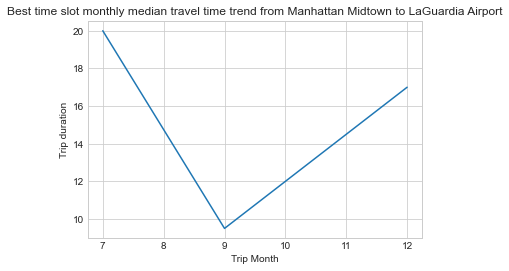

In [174]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Best time slot monthly median travel time trend from Manhattan Midtown to LaGuardia Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Worst time slot monthly trend

In [175]:
df_y2 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '17:00', '17:59'))

In [176]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '17:00', '17:59'))

In [177]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '17:00', '17:59'))

In [178]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '17:00', '17:59'))

In [179]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,33.0,1
2,30.0,2
3,28.0,3
4,29.5,4
5,34.0,5
6,31.0,6
7,32.0,7
8,28.0,8
9,33.5,9


Text(0, 0.5, 'Trip duration')

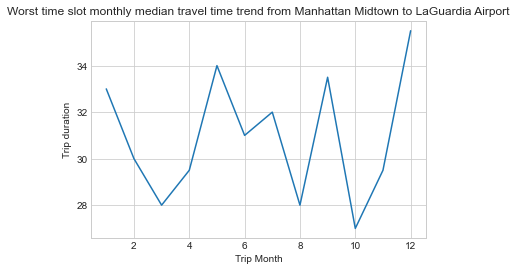

In [180]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Worst time slot monthly median travel time trend from Manhattan Midtown to LaGuardia Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Start point: Chelsea (zones 68, 246), Endpoint: LaGuardia Airport (Zone 138)

In [181]:
time_bin2 = {'00:00-00:59':[], '01:00-01:59':[], '02:00-02:59':[], '03:00-03:59':[], '04:00-04:59':[], '05:00-05:59' :[], '06:00-06:59':[], \
           '07:00-07:59':[], '08:00-08:59':[], '09:00-09:59':[], '10:00-10:59':[], '11:00-11:59':[], '12:00-12:59':[], '13:00-13:59':[], \
           '14:00-14:59':[], '15:00-15:59':[], '16:00-16:59':[], '17:00-17:59':[], '18:00-18:59':[], '19:00-19:59':[], '20:00-20:59':[], \
           '21:00-21:59':[], '22:00-22:59':[], '23:00-23:59':[]}

# Yellow taxi
df_y = df_yellow.query('pulocationid in ([68, 246]) & dolocationid==138 ')
df_y['trip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y = df_y.reset_index()

# geen taxi 
df_g = df_green.query('pulocationid in ([68, 246]) & dolocationid==138 ')
df_g['trip_duration'] = abs(pd.to_datetime(df_g['lpep_pickup_datetime']) - pd.to_datetime(df_g['lpep_dropoff_datetime'])).astype('timedelta64[m]')
df_g = df_g.reset_index()

# fhv taxi starting 
df_f = df_fhv.query('pulocationid in ([68, 246]) & dolocationid==138 ')
df_f['trip_duration'] = abs(pd.to_datetime(df_f['pickup_datetime']) - pd.to_datetime(df_f['dropoff_datetime'])).astype('timedelta64[m]')
df_f = df_f.reset_index()

# fhv taxi starting
df_fv = df_fhvhv.query('PULocationID in ([68, 246]) & DOLocationID==138 ')
df_fv['trip_duration'] = abs(pd.to_datetime(df_fv['pickup_datetime']) - pd.to_datetime(df_fv['dropoff_datetime'])).astype('timedelta64[m]')
df_fv = df_fv.reset_index()

In [182]:
time_bin2 = drip_duration(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime',time_bin2)

In [183]:
time_bin2 = drip_duration(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime',time_bin2) 

In [184]:
time_bin2 = drip_duration(df_f,'pickup_datetime', 'dropoff_datetime',time_bin2)

In [185]:
time_bin2 = drip_duration(df_fv,'pickup_datetime', 'pickup_datetime',time_bin2)

In [186]:
from statistics import median
x2 = []
y2 = []
time_bin_median2 = {}
for key in time_bin2:
    if len(time_bin2[key])>0:       
        x2.append(median(time_bin2[key]))
        y2.append(key)
        time_bin_median2[key]= median(time_bin2[key])

In [187]:
sorted(time_bin_median2.items(), key=lambda i: i[1]) 

[('22:00-22:59', 7.0),
 ('03:00-03:59', 19.0),
 ('04:00-04:59', 21.0),
 ('05:00-05:59', 23.0),
 ('00:00-00:59', 26.0),
 ('06:00-06:59', 26.0),
 ('21:00-21:59', 26.0),
 ('07:00-07:59', 29.0),
 ('11:00-11:59', 29.0),
 ('19:00-19:59', 29.5),
 ('08:00-08:59', 31.0),
 ('09:00-09:59', 31.0),
 ('10:00-10:59', 32.0),
 ('12:00-12:59', 33.0),
 ('20:00-20:59', 33.0),
 ('18:00-18:59', 34.0),
 ('13:00-13:59', 34.5),
 ('14:00-14:59', 34.5),
 ('16:00-16:59', 35.0),
 ('15:00-15:59', 36.0),
 ('17:00-17:59', 36.0)]

#### Best Time Slot

In [188]:
df_y1 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '22:00', '22:59'))

In [189]:
df_g1 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '22:00', '22:59'))

In [190]:
df_f1 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '22:00', '22:59'))

In [191]:
df_fv1 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '22:00', '22:59'))

In [192]:
df_concat = pd.concat([df_y1[['trip_month','trip_duration']],df_g1[['trip_month','trip_duration']],\
                      df_f1[['trip_month','trip_duration']], df_fv1[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
6,26.0,6
9,7.0,9


Text(0, 0.5, 'Trip duration')

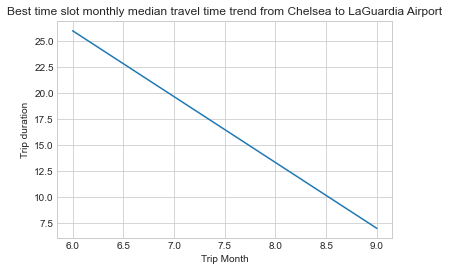

In [193]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Best time slot monthly median travel time trend from Chelsea to LaGuardia Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Worst time slot monthly trend

In [194]:
df_y2 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '17:00', '17:59'))

In [195]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '17:00', '17:59'))

In [196]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '17:00', '17:59'))

In [197]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '17:00', '17:59'))

In [198]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,28.5,1
3,34.0,3
4,29.0,4
5,40.0,5
6,32.0,6
7,36.0,7
8,35.0,8
9,57.0,9
10,34.0,10


Text(0, 0.5, 'Trip duration')

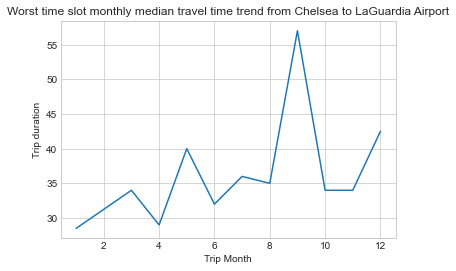

In [199]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Worst time slot monthly median travel time trend from Chelsea to LaGuardia Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Start point: Times Squeare (zone 230) or Garment District (zone 100), Endpoint: LaGuardia Airport(Zone 138)

In [200]:
time_bin3 = {'00:00-00:59':[], '01:00-01:59':[], '02:00-02:59':[], '03:00-03:59':[], '04:00-04:59':[], '05:00-05:59' :[], '06:00-06:59':[], \
           '07:00-07:59':[], '08:00-08:59':[], '09:00-09:59':[], '10:00-10:59':[], '11:00-11:59':[], '12:00-12:59':[], '13:00-13:59':[], \
           '14:00-14:59':[], '15:00-15:59':[], '16:00-16:59':[], '17:00-17:59':[], '18:00-18:59':[], '19:00-19:59':[], '20:00-20:59':[], \
           '21:00-21:59':[], '22:00-22:59':[], '23:00-23:59':[]}

# Yellow taxi 
df_y = df_yellow.query('pulocationid in ([230, 100]) & dolocationid==138 ')
df_y['trip_duration'] = abs(pd.to_datetime(df_y['tpep_pickup_datetime']) - pd.to_datetime(df_y['tpep_dropoff_datetime'])).astype('timedelta64[m]')
df_y = df_y.reset_index()

# geen taxi 
df_g = df_green.query('pulocationid in ([230, 100]) & dolocationid==138 ')
df_g['trip_duration'] = abs(pd.to_datetime(df_g['lpep_pickup_datetime']) - pd.to_datetime(df_g['lpep_dropoff_datetime'])).astype('timedelta64[m]')
df_g = df_g.reset_index()

# fhv taxi 
df_f = df_fhv.query('pulocationid in ([230, 100]) & dolocationid==138 ')
df_f['trip_duration'] = abs(pd.to_datetime(df_f['pickup_datetime']) - pd.to_datetime(df_f['dropoff_datetime'])).astype('timedelta64[m]')
df_f = df_f.reset_index()

# fhv taxi 
df_fv = df_fhvhv.query('PULocationID in ([230, 100]) & DOLocationID==138 ')
df_fv['trip_duration'] = abs(pd.to_datetime(df_fv['pickup_datetime']) - pd.to_datetime(df_fv['dropoff_datetime'])).astype('timedelta64[m]')
df_fv = df_fv.reset_index()

In [201]:
time_bin3 = drip_duration(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime',time_bin3)

In [202]:
time_bin3 = drip_duration(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime',time_bin3)

In [203]:
time_bin3 = drip_duration(df_f,'pickup_datetime', 'dropoff_datetime',time_bin3)

In [204]:
time_bin3 = drip_duration(df_fv,'pickup_datetime', 'pickup_datetime',time_bin3) 

In [205]:
from statistics import median
x3 = []
y3 = []
time_bin_median3 = {}
for key in time_bin3:
    if len(time_bin3[key])>0:       
        x3.append(median(time_bin3[key]))
        y3.append(key)
        time_bin_median3[key]= median(time_bin3[key])

In [206]:
sorted(time_bin_median3.items(),key=lambda i: i[1]) 

[('21:00-21:59', 20.0),
 ('04:00-04:59', 21.0),
 ('05:00-05:59', 21.0),
 ('03:00-03:59', 22.0),
 ('06:00-06:59', 23.0),
 ('02:00-02:59', 23.5),
 ('22:00-22:59', 24.0),
 ('00:00-00:59', 25.0),
 ('01:00-01:59', 25.0),
 ('07:00-07:59', 25.0),
 ('08:00-08:59', 26.0),
 ('20:00-20:59', 26.0),
 ('23:00-23:59', 26.0),
 ('11:00-11:59', 28.0),
 ('09:00-09:59', 29.0),
 ('10:00-10:59', 29.0),
 ('12:00-12:59', 29.0),
 ('13:00-13:59', 29.0),
 ('19:00-19:59', 30.0),
 ('14:00-14:59', 32.0),
 ('15:00-15:59', 32.0),
 ('18:00-18:59', 32.0),
 ('16:00-16:59', 33.0),
 ('17:00-17:59', 35.0)]

#### Best Time Slot

In [207]:
df_y1 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '21:00', '21:59'))

In [208]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '21:00', '21:59'))

In [209]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '21:00', '21:59'))

In [210]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '21:00', '21:59'))

In [211]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,30.0,1
3,32.0,3
5,40.0,5
6,32.0,6
7,36.0,7
8,40.0,8
11,33.0,11
12,42.5,12


Text(0, 0.5, 'Trip duration')

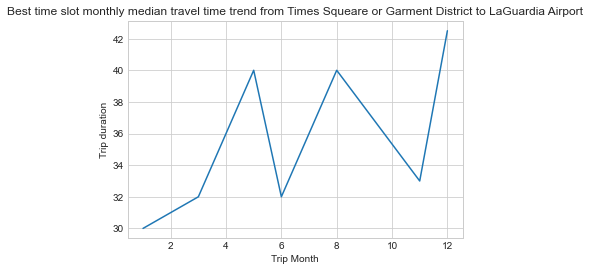

In [212]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Best time slot monthly median travel time trend from Times Squeare or Garment District to LaGuardia Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

#### Worst time slot monthly trend

In [213]:
df_y2 = pd.DataFrame(time_slot(df_y,'tpep_pickup_datetime', 'tpep_dropoff_datetime', '17:00', '17:59'))

In [214]:
df_g2 = pd.DataFrame(time_slot(df_g,'lpep_pickup_datetime', 'lpep_dropoff_datetime', '17:00', '17:59'))

In [215]:
df_f2 = pd.DataFrame(time_slot(df_f,'pickup_datetime', 'dropoff_datetime', '17:00', '17:59'))

In [216]:
df_fv2 = pd.DataFrame(time_slot(df_fv,'pickup_datetime', 'dropoff_datetime', '17:00', '17:59'))

In [217]:
df_concat = pd.concat([df_y2[['trip_month','trip_duration']],df_g2[['trip_month','trip_duration']],\
                      df_f2[['trip_month','trip_duration']], df_fv2[['trip_month','trip_duration']]],ignore_index=True)
df_concat
df_concat = df_concat.groupby(['trip_month']).agg({'trip_duration':'median'})
df_concat['Trip_Month']= df_concat.index
df_concat

,trip_duration,Trip_Month
trip_month,,
1,30.0,1
2,29.5,2
3,35.0,3
4,30.0,4
5,30.0,5
6,35.0,6
7,40.0,7
8,30.0,8
9,33.0,9


Text(0, 0.5, 'Trip duration')

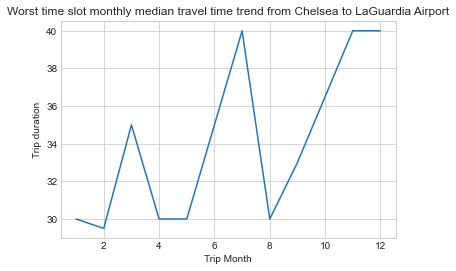

In [218]:
plt.plot(df_concat['Trip_Month'],df_concat['trip_duration'])
plt.title('Worst time slot monthly median travel time trend from Chelsea to LaGuardia Airport',fontsize=12)
plt.xlabel('Trip Month')
plt.ylabel('Trip duration')

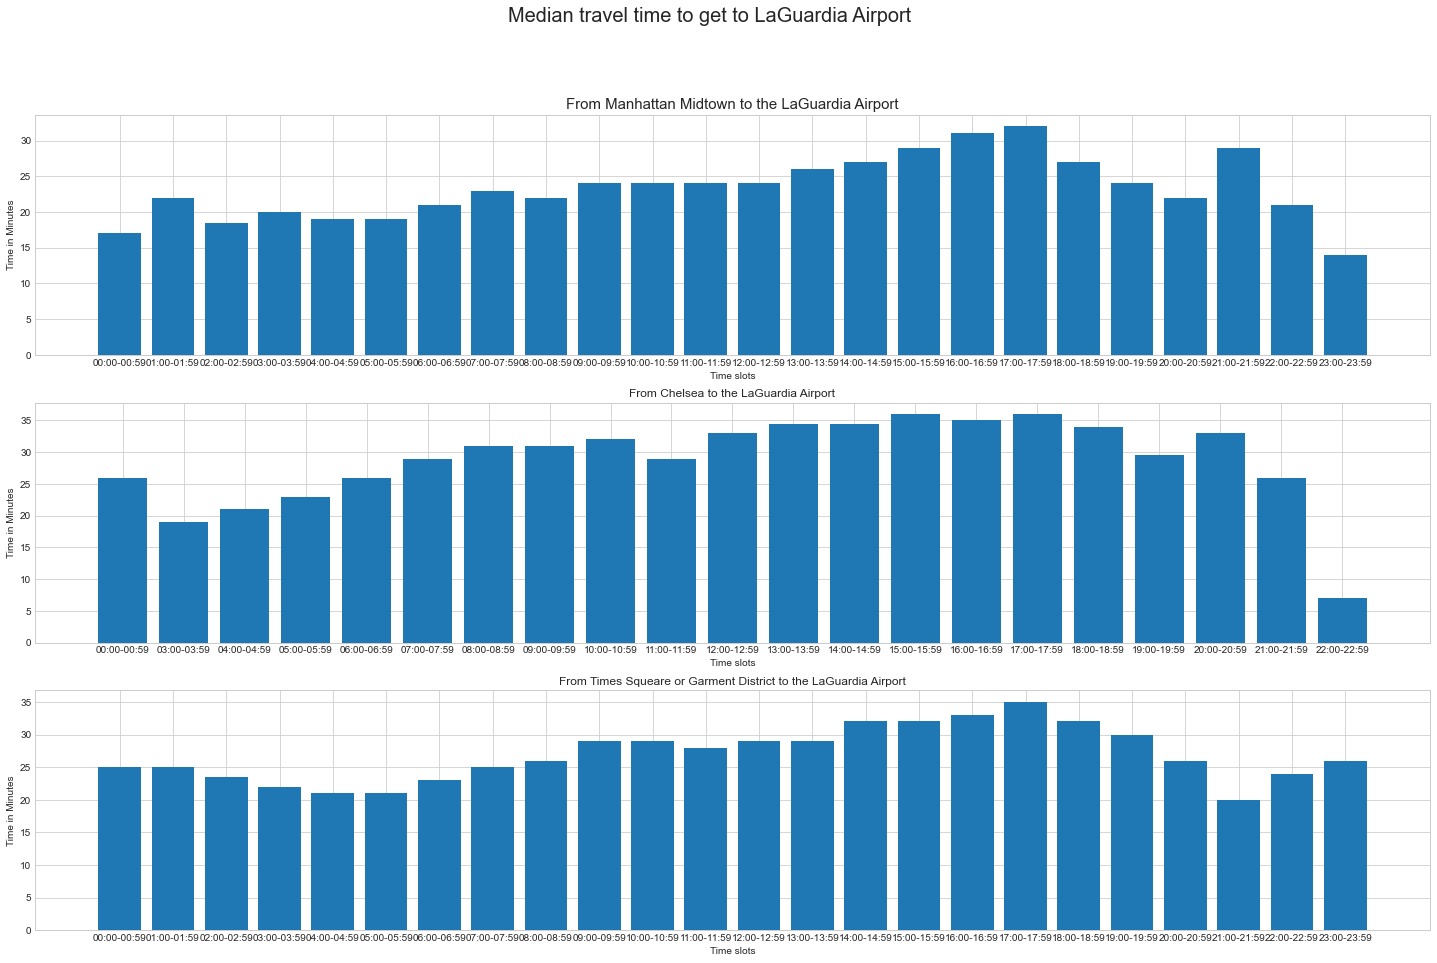

In [219]:
fig, axs = plt.subplots(3, 1, figsize=(25,15))
axs[0].bar(y,x)
axs[0].set_title('From Manhattan Midtown to the LaGuardia Airport', fontsize=15)
axs[1].bar(y2,x2)
axs[1].set_title("From Chelsea to the LaGuardia Airport")
axs[2].bar(y3,x3)
axs[2].set_title("From Times Squeare or Garment District to the LaGuardia Airport")

fig.suptitle('Median travel time to get to LaGuardia Airport', fontsize=20)

for ax in axs.flat:
    ax.set(xlabel='Time slots', ylabel='Time in Minutes')